In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

In [7]:
# Read data

match_rep_df = pd.read_csv("checkpoints/match_rep_df_NEW_PROFILES.csv")


experiment_df = pd.read_csv("output/all-profile-metadata.csv")
experiment_df

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,z_plane,BF_Zplanes,Anomaly,Unnamed: 0,spinning-disc,aperture,dry-immersion,vs-brightfield,simultaneous-excitation,sites
0,MolDev,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,1.0,1,10,6,1,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,MolDev,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,1.0,1,10,6,1,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,MolDev,1siteSubSample_Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,1.0,1,10,6,1,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,MolDev,1siteSubSample_Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,1.0,1,20,6,1,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,MolDev,1siteSubSample_Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Confocal,9,1.0,1,20,6,1,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,JUMP-MOA_compound_platemap,BRO0117056_20x,Confocal,9,NaN,1,20,5,1,none,none,50.0,NaN,1.0,water,no,2.0,9.0
179,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch_12Z,JUMP-MOA_compound_platemap,BRO0117056_20xb,Confocal,9,NaN,1,20,5,12,none,none,51.0,NaN,1.0,water,no,2.0,9.0
180,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,NaN,1,20,6,12,15,none,53.0,NaN,1.0,water,yes,4.0,9.0
181,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,NaN,1,20,6,12,13,none,54.0,NaN,1.0,water,yes,1.0,9.0


For each profile, find the channel names from the load_data csvs. Then, find profiles that use 6-channel imaging and compare the actin to golgi correlation with 5 channel profiles

In [63]:
# Find channel names from load_data_csvs

def find_channel_names(metadata_df, load_data_path):
    plates = []
    df = metadata_df.copy()

    for root, dirs, files in os.walk(load_data_path):
        for file in files:
            if "load_data_with_illum.csv" in file:
                path = os.path.join(root, file)
                plate = os.path.split(path)[0].split("/")[-1]
                plates.append(plate)
                if plate not in metadata_df["Assay_Plate_Barcode"].values:
                    print(path, plate)
                columns = pd.read_csv(path).columns.tolist()
                channels = sorted([i.replace("FileName_Orig", "") for i in columns if "FileName_Orig" in i])
                channels = ", ".join(channels)
                # df.loc[df["Assay_Plate_Barcode"] == plate, "channel_names"] = ", ".join(channels)
                df.loc[df["Assay_Plate_Barcode"] == plate, "channel_names"] = channels
    return df

experiment_df = find_channel_names(experiment_df, "../jump-scope/load_data_csv/")
set(experiment_df.channel_names)

for i, _ in experiment_df.groupby("channel_names", sort=False, as_index=False):
    print(i)

# t.to_csv("test.csv")

../jump-scope/load_data_csv/2020_11_06_Scope1_MolDev/Plate3_PCO_6ch_1site_10XPA_Crestz/load_data_with_illum.csv Plate3_PCO_6ch_1site_10XPA_Crestz
../jump-scope/load_data_csv/2020_11_06_Scope1_MolDev/Plate3_PCO_6ch_1site_10XPA_Crest/load_data_with_illum.csv Plate3_PCO_6ch_1site_10XPA_Crest
../jump-scope/load_data_csv/2020_11_06_Scope1_MolDev/Plate2-PCO-6ch-1site-10XPA/load_data_with_illum.csv Plate2-PCO-6ch-1site-10XPA
../jump-scope/load_data_csv/2020_11_16_Scope1_YokogawaUS/BRO0117033_20x/load_data_with_illum.csv BRO0117033_20x
../jump-scope/load_data_csv/2020_11_16_Scope1_YokogawaUS/BRO0117014_20x/load_data_with_illum.csv BRO0117014_20x
Actin, DNA, ER, Golgi, Mito, RNA
AGP, DNA, ER, Mito
DNA, ER, Mito, RNA, WGPhalloidin
AGP, DNA, ER, Mito, RNA
AGP, BrightField, DNA, ER, Mito, RNA


In [64]:
for i, j in experiment_df.iterrows():
    print(j["channel_names"])

Actin, DNA, ER, Golgi, Mito, RNA
Actin, DNA, ER, Golgi, Mito, RNA
Actin, DNA, ER, Golgi, Mito, RNA
Actin, DNA, ER, Golgi, Mito, RNA
Actin, DNA, ER, Golgi, Mito, RNA
Actin, DNA, ER, Golgi, Mito, RNA
AGP, DNA, ER, Mito
AGP, DNA, ER, Mito
AGP, DNA, ER, Mito
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
DNA, ER, Mito, RNA, WGPhalloidin
AGP, DNA, ER, Mito, RNA
AGP, DNA, ER, Mito, RNA
AGP,

In [93]:
def search_correlations(metadata_df, profile_path):
    """
    Reads *_normalized_feature_select_negcon_batch.csv.gz
    and performs a function on the dataframe 
    """
    df_list = []
    metadata_df = metadata_df[~metadata_df["Batch"].str.contains("siteSub")]
    for ind, row in metadata_df.iterrows():
        df_path = os.path.join(profile_path, row["Batch"], row["Assay_Plate_Barcode"], f"{row['Assay_Plate_Barcode']}.csv.gz")
        df_path = glob.glob(df_path)[0]
        load_df = pd.read_csv(df_path)
        cols = [i for i in load_df.columns if ("Golgi" in i and "Actin" in i and "Costes" in i) or 
                                                ("Golgi" in i and "DNA" in i and "Costes" in i) or
                                                ("Actin" in i and "DNA" in i and "Costes" in i) or
                                                ("AGP" in i)
                                                ]
        load_df = load_df[cols]
        load_df.agg(np.mean)
        load_df["Batch"], load_df["Assay_Plate_Number"], load_df["channel_names"] = [row["Batch"], row["Assay_Plate_Barcode"], row["channel_names"]]
        df_list.append(load_df)
    out_df = pd.concat(df_list)
    out_df = out_df.groupby(
                        "channel_names",as_index=False).agg(np.mean)
    return out_df

corr_df = search_correlations(experiment_df, "../jump-scope/profiles/")


/var/folders/rw/691cc6h16f9cfxlh9g6bpq400000gq/T/ipykernel_5085/2898691040.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out_df = out_df.groupby(


In [94]:
corr_df

,channel_names,Cells_Correlation_Costes_Actin_DNA,Cells_Correlation_Costes_Actin_Golgi,Cells_Correlation_Costes_DNA_Actin,Cells_Correlation_Costes_DNA_Golgi,Cells_Correlation_Costes_Golgi_Actin,Cells_Correlation_Costes_Golgi_DNA,Cytoplasm_Correlation_Costes_Actin_DNA,Cytoplasm_Correlation_Costes_Actin_Golgi,Cytoplasm_Correlation_Costes_DNA_Actin,...,Cytoplasm_Correlation_RWC_AGP_BrightField,Cytoplasm_Correlation_RWC_BrightField_AGP,Nuclei_Correlation_Correlation_AGP_BrightField,Nuclei_Correlation_K_AGP_BrightField,Nuclei_Correlation_K_BrightField_AGP,Nuclei_Correlation_Manders_AGP_BrightField,Nuclei_Correlation_Manders_BrightField_AGP,Nuclei_Correlation_Overlap_AGP_BrightField,Nuclei_Correlation_RWC_AGP_BrightField,Nuclei_Correlation_RWC_BrightField_AGP
0,"AGP, BrightField, DNA, ER, Mito, RNA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.481902,0.39374,-0.038237,1.569456,1.370417,0.999665,0.965608,0.964373,0.640373,0.654264
1,"AGP, DNA, ER, Mito",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"AGP, DNA, ER, Mito, RNA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Actin, DNA, ER, Golgi, Mito, RNA",0.377724,0.803886,0.46121,0.886451,0.813512,0.808058,0.301751,0.781388,0.470787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"DNA, ER, Mito, RNA, WGPhalloidin",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
corr_df.columns.str.contains("AGP")

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
feats = [["Golgi", "Actin"], ["Golgi", "DNA"], ["Actin", "DNA"], ["AGP", "DNA"]] 

<BarContainer object of 7 artists>

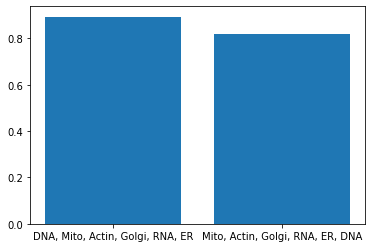

In [39]:
df_subset = corr_df.copy()
for i in feats:
    df_subset = df_subset[df_subset]

fig, ax = plt.subplots()

feats = [["Golgi", "Actin"], ["Golgi", "DNA"], ["Actin", "DNA"], ["AGP", "DNA"]] 

ax.bar(corr_df["channel_names"], corr_df["Cells_Correlation_Costes_Actin_Golgi"])

In [22]:
t = pd.DataFrame({"A": [1,2,2], "B": [1,2,4]})

t.agg(np.mean)


A    1.666667
B    2.333333
dtype: float64